<a href="https://colab.research.google.com/github/jubair231dd/Python-Codes/blob/master/Pytorch_custom_dataset_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import Necessary Libraries

In [2]:
import torch
from torch import nn
import glob
import numpy as np
import matplotlib.pyplot as plt


torch.__version__

import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets

from torchsummary import summary
from tqdm.notebook import trange, tqdm

# Set up the device

In [3]:
# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

# Load the data

This is the original data. This file is so large. It loads the data. However, the data is so large that it takes a lot of time to train the data. That's why i split the data into smaller size. So, that we can see the result. Please load the smaller data frame to run the neural net. 

Otherwise the training time is so long.

In [ ]:
# #original dataset
# import torch
# from torchvision.datasets import DatasetFolder
# from torchvision.transforms import transforms
# from PIL import Image

# class CustomDataset(torch.utils.data.Dataset):
#     def __init__(self, root, transform=None):
#         self.root = root
#         self.transform = transform
#         self.images = []

#         # Load all the images in the root folder
#         for filename in os.listdir(root):
#             if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
#                 self.images.append(os.path.join(root, filename))

#     def __len__(self):
#         return len(self.images)

#     def __getitem__(self, idx):
#         img_path = self.images[idx]
#         img = Image.open(img_path)

#         if self.transform is not None:
#             img = self.transform(img)

#         return img, 0  # Return a dummy label '0'

# # Define the transforms to apply to the images
# train_transform = transforms.Compose([
#     transforms.Resize(size=(28,28)),
#     # transforms.Grayscale(),
#     transforms.ToTensor(),
#     # transforms.Normalize((0.5,), (0.5,))
# ])

# test_transform = transforms.Compose([
#     transforms.Resize(size=(28,28)),
#     # transforms.Grayscale(),
#     transforms.ToTensor(),
#     # transforms.Normalize((0.5,), (0.5,))
# ])

# # Set the path to your train folder
# train_path = "/content/drive/MyDrive/ML_JP/assignment_3/data/train/"
# test_path = "/content/drive/MyDrive/ML_JP/assignment_3/data/test1/"

# # Create the custom dataset
# train_dataset = CustomDataset(train_path, transform=train_transform)
# test_dataset = CustomDataset(test_path, transform=test_transform)

# # Create the dataloader
# train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=3000, shuffle=True)
# test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=3000, shuffle=True)


# Original Dataset
This datset loads fine but it takes a lot time to train due to large data

In [5]:
train_transform = transforms.Compose([
    transforms.Resize(size=(28,28)),
    transforms.Grayscale(),
    transforms.ToTensor(),
    # transforms.Normalize((0.5,), (0.5,))
])

test_transform = transforms.Compose([
    transforms.Resize(size=(28,28)),
    transforms.Grayscale(),
    transforms.ToTensor(),
    # transforms.Normalize((0.5,), (0.5,))
])


# Load the training set
train_dataset = datasets.ImageFolder('/content/drive/MyDrive/ML_JP/assignment_3/Cat_Dog_data/train', transform=train_transform)

# Create the data loader for the training set
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = datasets.ImageFolder('/content/drive/MyDrive/ML_JP/assignment_3/Cat_Dog_data/test', transform=test_transform)

# Create the data loader for the training set
test_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)


# Train the net on this smaller data 

Run this instead

In [13]:
#train on smaller data

import torch
from torchvision.datasets import DatasetFolder
from torchvision.transforms import transforms
from PIL import Image

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, root, transform=None):
        self.root = root
        self.transform = transform
        self.images = []

        # Load all the images in the root folder
        for filename in os.listdir(root):
            if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
                self.images.append(os.path.join(root, filename))

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        img = Image.open(img_path)

        if self.transform is not None:
            img = self.transform(img)

        return img, 0  # Return a dummy label '0'

# Define the transforms to apply to the images
train_transform = transforms.Compose([
    transforms.Resize(size=(28,28)),
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(p=0.5),
    # transforms.Normalize((0.5,), (0.5,))
])

test_transform = transforms.Compose([
    transforms.Resize(size=(28,28)),
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(p=0.5),
    # transforms.Normalize((0.5,), (0.5,))
])

# Set the path to your train folder
train_path = "/content/drive/MyDrive/ML_JP/assignment_3/demo_data/train/"
test_path = "/content/drive/MyDrive/ML_JP/assignment_3/demo_data/test/"

# Create the custom dataset
train_dataset = CustomDataset(train_path, transform=train_transform)
test_dataset = CustomDataset(test_path, transform=test_transform)

# Create the dataloader
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)


torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])


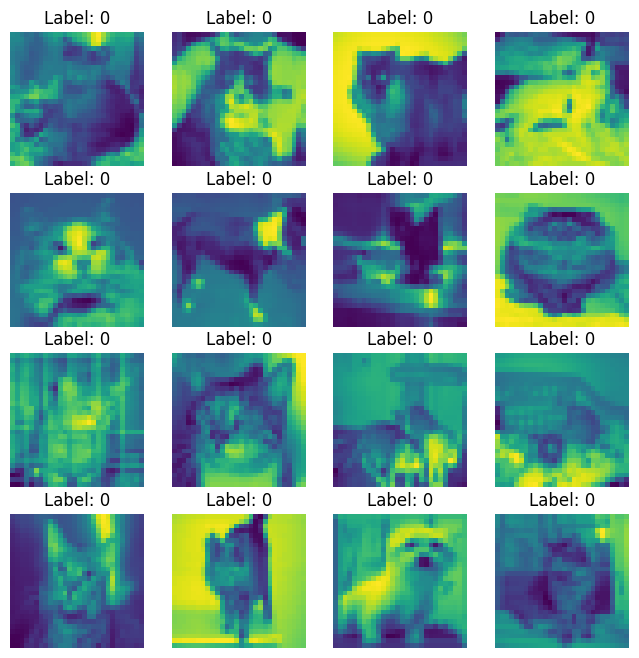

In [14]:
data, labels = next(iter(train_dataloader))

# Plot the first 16 images in the batch
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(data[i].permute(1, 2, 0))
    ax.set_title(f"Label: {labels[i]}")
    ax.axis('off')
    print(data[i].shape)
plt.show()

In [15]:
len(train_dataloader), len(test_dataloader)

(210, 42)

In [16]:
latent_dims = 30 #80
num_epochs = 10
# batch_size = 128
capacity = 16
learning_rate = 1e-3
use_gpu = True

#Architecture from the lecture slides 

In [17]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        c = capacity
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=c, kernel_size=2, stride=2, padding=1) # out: c x 14 x 14 (c x 28 x 28)
        self.conv2 = nn.Conv2d(in_channels=c, out_channels=c*2, kernel_size=2, stride=2, padding=1) # out: c x 7 x 7 (c x 14 x 14)
        self.conv3 = nn.Conv2d(c*2, c*4, 2)
        # self.fc = nn.Linear(in_features=c*2*14*14, out_features=latent_dims)
            
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        # print(x.size())
        # print(x.size(0))
        # x = x.view(x.size(0), -1) # flatten batch of multi-channel feature maps to a batch of feature vectors
        # x = self.fc(x)
        return x

class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        c = capacity
        # self.fc = nn.Linear(in_features=latent_dims, out_features=c*2*14*14)
        self.conv3 = nn.ConvTranspose2d(c*4, c*2, 2)
        self.conv2 = nn.ConvTranspose2d(in_channels=c*2, out_channels=c, kernel_size=2, stride=2, padding = 1, output_padding=1)
        self.conv1 = nn.ConvTranspose2d(in_channels=c, out_channels=3, kernel_size=2, stride=2, padding = 1, output_padding=1)
        self.conv0 = nn.ConvTranspose2d(in_channels=3, out_channels=1, kernel_size=2, stride=2, padding = 1, output_padding=1)
            
    def forward(self, x):
        c = capacity
        # x = self.fc(x)
        # x = x.view(x.size(0), c*2, 14, 14) # unflatten batch of feature vectors to a batch of multi-channel feature maps
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv1(x)) # last layer before output is tanh, since the images are normalized and 0-centered
        x = torch.sigmoid(self.conv0(x))
        return x
    
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()
    
    def forward(self, x):
        latent = self.encoder(x)
        x_recon = self.decoder(latent)
        return x_recon
    
autoencoder = Autoencoder()

device = "cuda:0" if torch.cuda.is_available() else "cpu"
autoencoder = autoencoder.to(device)

num_params = sum(p.numel() for p in autoencoder.parameters() if p.requires_grad)
print('Number of parameters: %d' % num_params)
print(autoencoder)
print(device)

Number of parameters: 20912
Autoencoder(
  (encoder): Encoder(
    (conv1): Conv2d(1, 16, kernel_size=(2, 2), stride=(2, 2), padding=(1, 1))
    (conv2): Conv2d(16, 32, kernel_size=(2, 2), stride=(2, 2), padding=(1, 1))
    (conv3): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1))
  )
  (decoder): Decoder(
    (conv3): ConvTranspose2d(64, 32, kernel_size=(2, 2), stride=(1, 1))
    (conv2): ConvTranspose2d(32, 16, kernel_size=(2, 2), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (conv1): ConvTranspose2d(16, 3, kernel_size=(2, 2), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (conv0): ConvTranspose2d(3, 1, kernel_size=(2, 2), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
  )
)
cuda:0


# Train the model 

In [18]:
optimizer = torch.optim.Adam(params=autoencoder.parameters(), lr=learning_rate, weight_decay=1e-5)
# num_epochs = 5
# set to training mode
autoencoder.train()

train_loss_avg = []

print('Training ...')
for epoch in range(num_epochs):
    train_loss_avg.append(num_epochs)
    num_batches = 0
    
    for (image_batch, _) in tqdm(train_dataloader, desc = "Processing items"):
        
        image_batch = image_batch.to(device)
        
        # autoencoder reconstruction
        image_batch_recon = autoencoder(image_batch)
        image_batch = torch.nn.functional.interpolate(image_batch, size=57, mode='bilinear', align_corners=False)
        # reconstruction error
        loss = F.mse_loss(image_batch_recon, image_batch)
        
        # backpropagation
        optimizer.zero_grad()
        loss.backward()
        
        # one step of the optmizer (using the gradients from backpropagation)
        optimizer.step()
        
        train_loss_avg[-1] += loss.item()
        num_batches += 1
        
    train_loss_avg[-1] /= num_batches
    print('Epoch [%d / %d] average reconstruction error: %f' % (epoch+1, num_epochs, train_loss_avg[-1]))

Training ...


Processing items:   0%|          | 0/210 [00:00<?, ?it/s]

Epoch [1 / 10] average reconstruction error: 0.084401


Processing items:   0%|          | 0/210 [00:00<?, ?it/s]

Epoch [2 / 10] average reconstruction error: 0.061255


Processing items:   0%|          | 0/210 [00:00<?, ?it/s]

Epoch [3 / 10] average reconstruction error: 0.057503


Processing items:   0%|          | 0/210 [00:00<?, ?it/s]

Epoch [4 / 10] average reconstruction error: 0.055500


Processing items:   0%|          | 0/210 [00:00<?, ?it/s]

Epoch [5 / 10] average reconstruction error: 0.054082


Processing items:   0%|          | 0/210 [00:00<?, ?it/s]

Epoch [6 / 10] average reconstruction error: 0.053021


Processing items:   0%|          | 0/210 [00:00<?, ?it/s]

Epoch [7 / 10] average reconstruction error: 0.052217


Processing items:   0%|          | 0/210 [00:00<?, ?it/s]

Epoch [8 / 10] average reconstruction error: 0.051597


Processing items:   0%|          | 0/210 [00:00<?, ?it/s]

Epoch [9 / 10] average reconstruction error: 0.051137


Processing items:   0%|          | 0/210 [00:00<?, ?it/s]

Epoch [10 / 10] average reconstruction error: 0.050792


In [19]:
summary(autoencoder,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 15, 15]              80
            Conv2d-2             [-1, 32, 8, 8]           2,080
            Conv2d-3             [-1, 64, 7, 7]           8,256
           Encoder-4             [-1, 64, 7, 7]               0
   ConvTranspose2d-5             [-1, 32, 8, 8]           8,224
   ConvTranspose2d-6           [-1, 16, 15, 15]           2,064
   ConvTranspose2d-7            [-1, 3, 29, 29]             195
   ConvTranspose2d-8            [-1, 1, 57, 57]              13
           Decoder-9            [-1, 1, 57, 57]               0
Total params: 20,912
Trainable params: 20,912
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.20
Params size (MB): 0.08
Estimated Total Size (MB): 0.29
---------------------------------------------

# Plot training curve

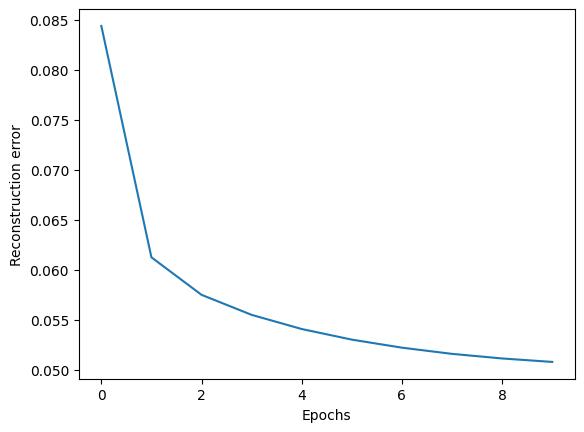

In [20]:
import matplotlib.pyplot as plt
plt.ion()

fig = plt.figure()
plt.plot(train_loss_avg)
plt.xlabel('Epochs')
plt.ylabel('Reconstruction error')
plt.show()

# Evaluate test set

In [21]:
# set to evaluation mode
autoencoder.eval()

test_loss_avg, num_batches = 0, 0
for image_batch, _ in tqdm(test_dataloader, desc="Processing Items"):
    
    with torch.no_grad():

        image_batch = image_batch.to(device)

        # autoencoder reconstruction
        image_batch_recon = autoencoder(image_batch)
        image_batch = torch.nn.functional.interpolate(image_batch, size=57, mode='bilinear', align_corners=False)
        # reconstruction error
        loss = F.mse_loss(image_batch_recon, image_batch)

        test_loss_avg += loss.item()
        num_batches += 1
    
test_loss_avg /= num_batches
print('average reconstruction error: %f' % (test_loss_avg))

Processing Items:   0%|          | 0/42 [00:00<?, ?it/s]

average reconstruction error: 0.002932


# Visual reconstruction

Original images


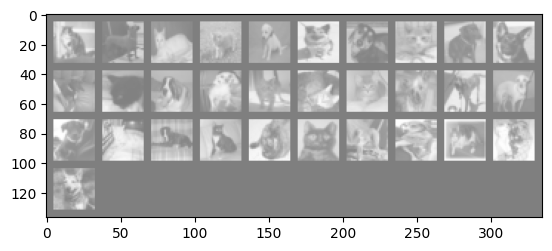

Autoencoder reconstruction:


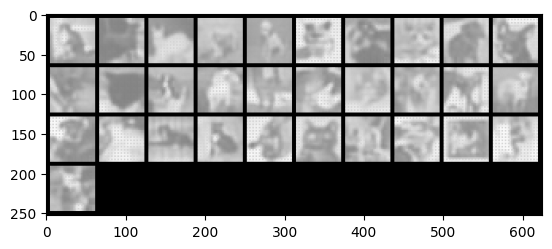

In [23]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

import torchvision.utils

autoencoder.eval()

# This function takes as an input the images to reconstruct
# and the name of the model with which the reconstructions
# are performed
def to_img(x):
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    return x

def show_image(img):
    img = to_img(img)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

def visualise_output(images, model):

    with torch.no_grad():

        images = images.to(device)
        images = model(images)
        images = images.cpu()
        images = to_img(images)
        np_imagegrid = torchvision.utils.make_grid(images[1:50], 10, 5).numpy()
        plt.imshow(np.transpose(np_imagegrid, (1, 2, 0)))
        plt.show()

images, labels = next(iter(test_dataloader))

# First visualise the original images
print('Original images')
show_image(torchvision.utils.make_grid(images[1:50],10,5))
plt.show()

# Reconstruct and visualise the images using the autoencoder
print('Autoencoder reconstruction:')
visualise_output(images, autoencoder)